Resultierende Transformationsmatrix:
[[-0.7071  0.7071]
 [ 0.7071  2.1213]]


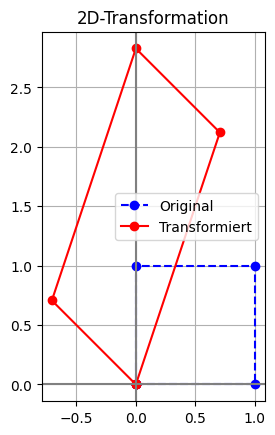

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Transformationen
def rotation_matrix(theta_deg):
    theta = np.radians(theta_deg)
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

def scaling_matrix(sx, sy):
    return np.array([
        [sx, 0],
        [0, sy]
    ])

def shear_matrix(kx, ky):
    return np.array([
        [1, kx],
        [ky, 1]
    ])

def reflection_matrix(axis='x'):
    if axis == 'x':
        return np.array([[1, 0], [0, -1]])
    elif axis == 'y':
        return np.array([[-1, 0], [0, 1]])
    elif axis == 'origin':
        return np.array([[-1, 0], [0, -1]])
    elif axis == 'y=x':
        return np.array([[0, 1], [1, 0]])
    else:
        raise ValueError("Unbekannte Spiegelachse")

# Zeichnen
def plot_vectors(original, transformed):
    fig, ax = plt.subplots()
    original = np.array(original)
    transformed = np.array(transformed)

    # Ursprünglich (blau)
    ax.plot(*np.hstack([original, original[:, [0]]]), 'bo--', label="Original")
    ax.plot(*np.hstack([transformed, transformed[:, [0]]]), 'ro-', label="Transformiert")

    # Achsen
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
    ax.set_title("2D-Transformation")
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    plt.show()

# Hauptfunktion
def transform_2d_shape(transformations):
    # Beispiel: Rechteck
    shape = np.array([
        [0, 1, 1, 0, 0],  # x
        [0, 0, 1, 1, 0]   # y
    ])

    # Initiale Matrix
    T = np.identity(2)

    # Alle Transformationen anwenden
    for M in transformations:
        T = M @ T

    # Transformation anwenden
    transformed_shape = T @ shape

    # Matrix anzeigen
    print("Resultierende Transformationsmatrix:")
    print(np.round(T, 4))

    # Zeichnung
    plot_vectors(shape, transformed_shape)

# ==========================
# ⬇️ Hier Transformationen definieren:

transformations = [
    rotation_matrix(45),
    scaling_matrix(1.5, 2),
    shear_matrix(0, -1),
    reflection_matrix('y')
]

transform_2d_shape(transformations)
